In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [30]:
X = data.iloc[:,1:2].values
Y = data.iloc[:,2:3].values
print([X.shape, Y.shape])

[(10, 1), (10, 1)]


In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

In [32]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
reg.fit(X, Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
print(sc_Y.inverse_transform(reg.predict(sc_X.transform(np.array([[6.5]])))))

[170370.0204065]


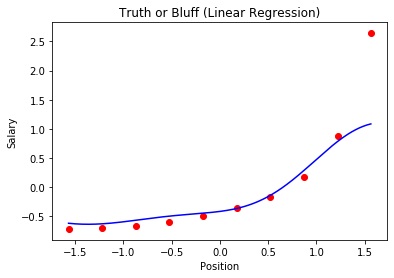

In [34]:
X_grid = np.arange(min(X),max(X),step=0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,Y,color='r')
plt.plot(X_grid,reg.predict(X_grid),color='b')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()